In [44]:
import pandas as pd
import numpy as np

In [45]:
data = pd.read_csv('Wholesale customers data.csv')

In [46]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## data preprocessing

In [47]:
# check for NaN
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [48]:
# check for outliers
outliers = {}

for i in range(data.shape[1]):
    min_ = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
    max_ = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
    count = 0
    for j in data[data.columns[i]]:
        if j < min_ or j > max_:
            count += 1
    outliers[data.columns[i]] = [count, data.shape[0] - count]

print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


In [49]:
for v in outliers.values():
    prop_outliers = (v[0] / data.shape[0]) * 100
    print(round(prop_outliers, 2))

0.0
0.0
1.59
2.05
1.59
1.36
2.27
0.91


In [50]:
# the proportion of outliers in dataset is relatively small - outliers won't be deleted

In [51]:
# data standarization
data_standarized = (data - data.mean())/data.std()
data_standarized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


## k-means Algorithm

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [53]:
# choose value of k (number of clusters)
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(data_standarized)
    ideal_k.append([i,est_kmeans.inertia_])

In [54]:
ideal_k = np.array(ideal_k)

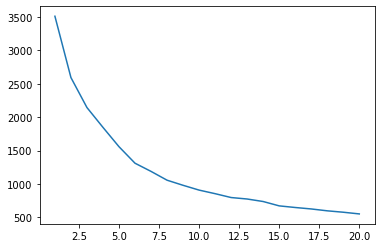

In [55]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

In [56]:
# breaking point of the plot is around 7 => k=7
est_kmeans = KMeans(n_clusters=7, random_state=0)
est_kmeans.fit(data_standarized)
pred_kmeans = est_kmeans.predict(data_standarized)

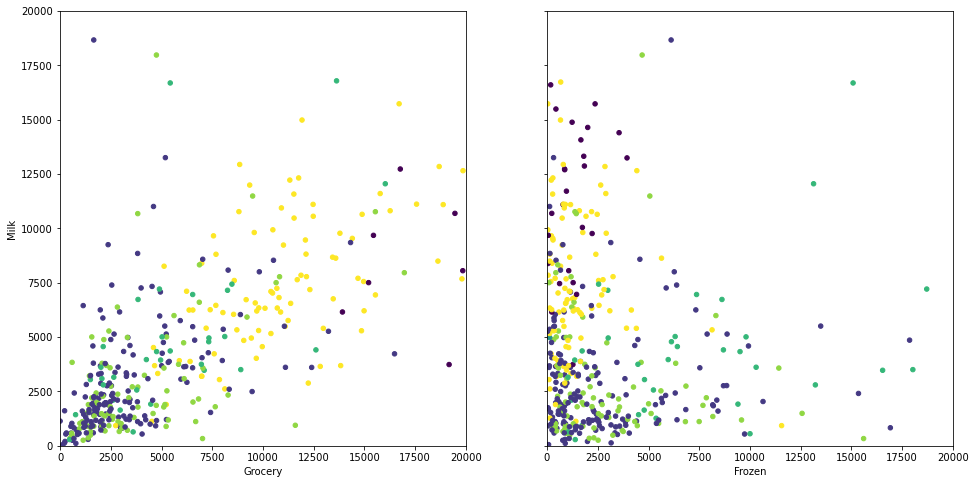

In [64]:
# show relation of 3 features
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))

plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_kmeans, s=20)

plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Frozen')

plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_kmeans, s=20)

plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')

plt.show()

## Mean-Shift Algorithm

In [66]:
from sklearn.cluster import MeanShift

In [67]:
# try with bandwidth value of 0.5
est_meanshift = MeanShift(bandwidth=0.5)
est_meanshift.fit(data_standarized)
pred_meanshift = est_meanshift.predict(data_standarized)

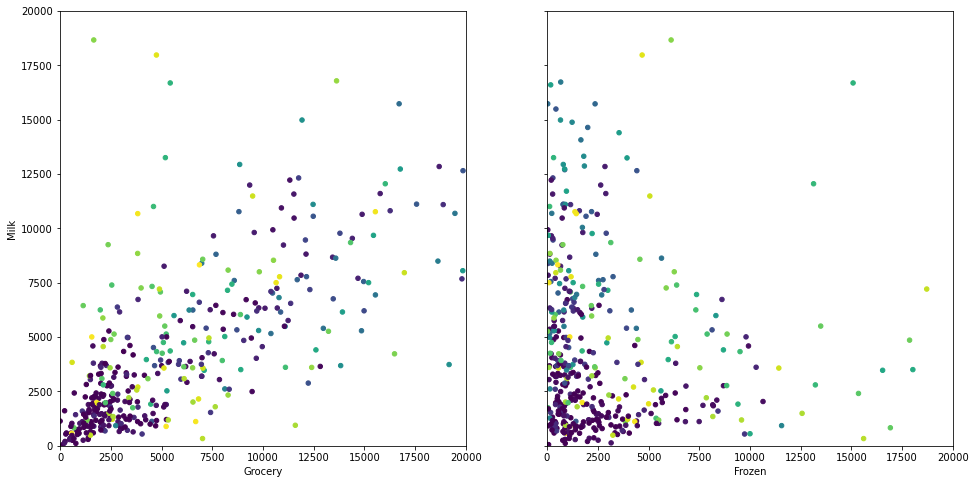

In [68]:
# show relation of 3 features
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))

plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_meanshift, s=20)

plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Frozen')

plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_meanshift, s=20)

plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')

plt.show()

## DBSCAN Algorithm

In [70]:
from sklearn.cluster import DBSCAN

In [79]:
est_dbscan = DBSCAN(eps=0.7)
pred_dbscan = est_dbscan.fit_predict(data_standarized)

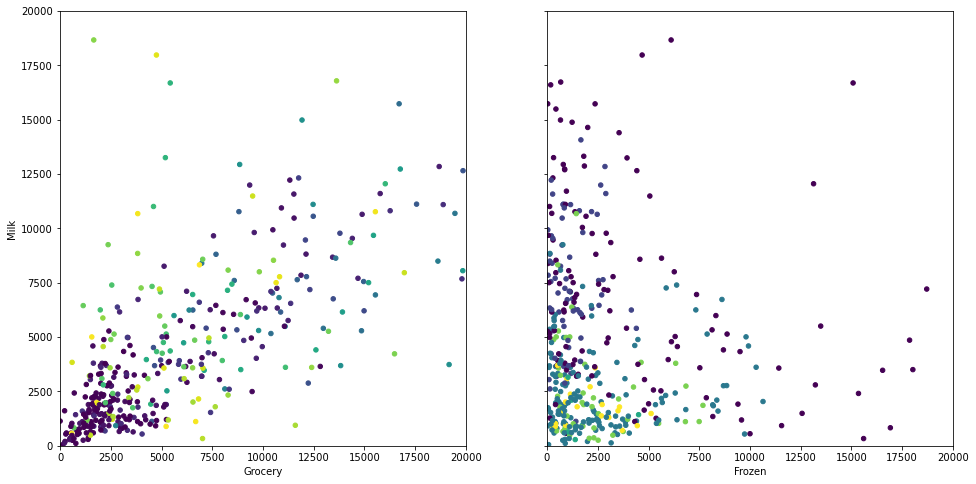

In [80]:
# show relation of 3 features
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))

plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_dbscan, s=20)

plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Frozen')

plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_meanshift, s=20)

plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')

plt.show()

## Evaluating the Performance of Clusters
### Evaluating the Silhouette Coefficient Score

In [81]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [84]:
kmeans_score = silhouette_score(data_standarized, pred_kmeans, metric='euclidean')
meanshift_score = silhouette_score(data_standarized, pred_meanshift, metric='euclidean')
dbscan_score = silhouette_score(data_standarized, pred_dbscan, metric='euclidean')

print('kmeans_score =', kmeans_score, '\nmeanshift_score =', meanshift_score, '\ndbscan_score =', dbscan_score)

kmeans_score = 0.35698470787130054 
meanshift_score = 0.12671878745648202 
dbscan_score = 0.12312321837784326


### Evaluating the Calinski–Harabasz Index

In [85]:
kmeans_score = calinski_harabasz_score(data_standarized, pred_kmeans)
meanshift_score = calinski_harabasz_score(data_standarized, pred_meanshift)
dbscan_score = calinski_harabasz_score(data_standarized, pred_dbscan)

print('kmeans_score =', kmeans_score, '\nmeanshift_score =', meanshift_score, '\ndbscan_score =', dbscan_score)

kmeans_score = 141.08046529355926 
meanshift_score = 92.96468819275904 
dbscan_score = 36.96153147730431
